In [68]:
import pandas as pd
import numpy as np
import plotnine as p9
from sklearn.decomposition import PCA 

In [18]:
df = pd.read_csv("/Users/deeppatel/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Yale/Courses/Fall_2024/CBB574/data/GSE174083_Normalized_READ_COUNTS_limma_batch_Corrected.csv")

In [19]:
df.head()

,Unnamed: 0,1001_T1_S353_L008_R1_001_fastq_gz_read_counts_txt,1001_T2_S3_L001_R1_001_fastq_gz_read_counts_txt,1001_T3_S29_L001_R1_001_fastq_gz_read_counts_txt,1001_T4_S344_L008_R1_001_fastq_gz_read_counts_txt,1003_T1_S101_L002_R1_001_fastq_gz_read_counts_txt,1003_T2_S121_L002_R1_001_fastq_gz_read_counts_txt,1003_T3_S103_L002_R1_001_fastq_gz_read_counts_txt,1003_T4_S109_L002_R1_001_fastq_gz_read_counts_txt,1004_T1_S40_L001_R1_001_fastq_gz_read_counts_txt,...,H03_S24_L001_R1_001_fastq_gz_read_counts_txt,H04_S32_L001_R1_001_fastq_gz_read_counts_txt,H05_S40_L001_R1_001_fastq_gz_read_counts_txt,H06_S48_L001_R1_001_fastq_gz_read_counts_txt,H07_S56_L001_R1_001_fastq_gz_read_counts_txt,H08_S64_L001_R1_001_fastq_gz_read_counts_txt,H09_S72_L001_R1_001_fastq_gz_read_counts_txt,H10_S80_L001_R1_001_fastq_gz_read_counts_txt,H11_S88_L001_R1_001_fastq_gz_read_counts_txt,H12_S96_L001_R1_001_fastq_gz_read_counts_txt
0,ENSG00000000003,4.486827,4.486827,4.486827,4.486827,4.430585,4.430585,4.430585,4.430585,4.430585,...,4.492085,4.492085,4.492085,4.492085,4.492085,4.492085,5.026669,4.492085,4.492085,4.492085
1,ENSG00000000419,4.667911,4.365893,4.365893,5.845810,5.896482,4.880599,4.464524,4.464524,5.510194,...,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807
2,ENSG00000000457,5.544566,4.299838,5.988852,5.390159,4.549511,5.765730,4.549511,4.549511,6.439225,...,5.035134,5.035134,5.035134,5.035134,5.875261,6.132623,5.303570,5.035134,5.412321,6.464144
3,ENSG00000000460,4.800112,4.373767,5.540556,5.323409,4.560949,4.560949,4.560949,4.560949,4.560949,...,4.584687,4.584687,4.584687,4.584687,4.584687,4.584687,4.963769,4.584687,4.584687,4.584687
4,ENSG00000000938,7.609275,5.848698,7.996832,7.135918,7.617388,7.709303,8.398496,7.651188,8.625044,...,9.167889,8.791773,7.481140,7.164388,6.912436,8.406363,8.820425,7.810794,8.285124,7.967223


### Preprocessing and data cleaning

In [20]:
#Change the name of the first column to "gene_ID"
df.rename(columns = {'Unnamed: 0':'gene_ID'}, inplace = True)

In [21]:
df.head()

,gene_ID,1001_T1_S353_L008_R1_001_fastq_gz_read_counts_txt,1001_T2_S3_L001_R1_001_fastq_gz_read_counts_txt,1001_T3_S29_L001_R1_001_fastq_gz_read_counts_txt,1001_T4_S344_L008_R1_001_fastq_gz_read_counts_txt,1003_T1_S101_L002_R1_001_fastq_gz_read_counts_txt,1003_T2_S121_L002_R1_001_fastq_gz_read_counts_txt,1003_T3_S103_L002_R1_001_fastq_gz_read_counts_txt,1003_T4_S109_L002_R1_001_fastq_gz_read_counts_txt,1004_T1_S40_L001_R1_001_fastq_gz_read_counts_txt,...,H03_S24_L001_R1_001_fastq_gz_read_counts_txt,H04_S32_L001_R1_001_fastq_gz_read_counts_txt,H05_S40_L001_R1_001_fastq_gz_read_counts_txt,H06_S48_L001_R1_001_fastq_gz_read_counts_txt,H07_S56_L001_R1_001_fastq_gz_read_counts_txt,H08_S64_L001_R1_001_fastq_gz_read_counts_txt,H09_S72_L001_R1_001_fastq_gz_read_counts_txt,H10_S80_L001_R1_001_fastq_gz_read_counts_txt,H11_S88_L001_R1_001_fastq_gz_read_counts_txt,H12_S96_L001_R1_001_fastq_gz_read_counts_txt
0,ENSG00000000003,4.486827,4.486827,4.486827,4.486827,4.430585,4.430585,4.430585,4.430585,4.430585,...,4.492085,4.492085,4.492085,4.492085,4.492085,4.492085,5.026669,4.492085,4.492085,4.492085
1,ENSG00000000419,4.667911,4.365893,4.365893,5.845810,5.896482,4.880599,4.464524,4.464524,5.510194,...,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807
2,ENSG00000000457,5.544566,4.299838,5.988852,5.390159,4.549511,5.765730,4.549511,4.549511,6.439225,...,5.035134,5.035134,5.035134,5.035134,5.875261,6.132623,5.303570,5.035134,5.412321,6.464144
3,ENSG00000000460,4.800112,4.373767,5.540556,5.323409,4.560949,4.560949,4.560949,4.560949,4.560949,...,4.584687,4.584687,4.584687,4.584687,4.584687,4.584687,4.963769,4.584687,4.584687,4.584687
4,ENSG00000000938,7.609275,5.848698,7.996832,7.135918,7.617388,7.709303,8.398496,7.651188,8.625044,...,9.167889,8.791773,7.481140,7.164388,6.912436,8.406363,8.820425,7.810794,8.285124,7.967223


In [22]:
columns = df.columns.to_list()

In [23]:
columns[0:5]

['gene_ID',
 '1001_T1_S353_L008_R1_001_fastq_gz_read_counts_txt',
 '1001_T2_S3_L001_R1_001_fastq_gz_read_counts_txt',
 '1001_T3_S29_L001_R1_001_fastq_gz_read_counts_txt',
 '1001_T4_S344_L008_R1_001_fastq_gz_read_counts_txt']

In [24]:
updated_columns = ['gene_ID']

for i in range(1, len(columns)):
    updated_columns.append(columns[i][0:7])

updated_columns[0:5]

['gene_ID', '1001_T1', '1001_T2', '1001_T3', '1001_T4']

In [25]:
# Updating the column names
df.columns = updated_columns

In [26]:
df.head()

,gene_ID,1001_T1,1001_T2,1001_T3,1001_T4,1003_T1,1003_T2,1003_T3,1003_T4,1004_T1,...,H03_S24,H04_S32,H05_S40,H06_S48,H07_S56,H08_S64,H09_S72,H10_S80,H11_S88,H12_S96
0,ENSG00000000003,4.486827,4.486827,4.486827,4.486827,4.430585,4.430585,4.430585,4.430585,4.430585,...,4.492085,4.492085,4.492085,4.492085,4.492085,4.492085,5.026669,4.492085,4.492085,4.492085
1,ENSG00000000419,4.667911,4.365893,4.365893,5.845810,5.896482,4.880599,4.464524,4.464524,5.510194,...,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807
2,ENSG00000000457,5.544566,4.299838,5.988852,5.390159,4.549511,5.765730,4.549511,4.549511,6.439225,...,5.035134,5.035134,5.035134,5.035134,5.875261,6.132623,5.303570,5.035134,5.412321,6.464144
3,ENSG00000000460,4.800112,4.373767,5.540556,5.323409,4.560949,4.560949,4.560949,4.560949,4.560949,...,4.584687,4.584687,4.584687,4.584687,4.584687,4.584687,4.963769,4.584687,4.584687,4.584687
4,ENSG00000000938,7.609275,5.848698,7.996832,7.135918,7.617388,7.709303,8.398496,7.651188,8.625044,...,9.167889,8.791773,7.481140,7.164388,6.912436,8.406363,8.820425,7.810794,8.285124,7.967223


In [27]:
df.index = df['gene_ID']

In [28]:
# Drop the column which doesnt start with '1'
df = df.loc[:, df.columns.str.startswith('1')]

In [29]:
df.head()

,1001_T1,1001_T2,1001_T3,1001_T4,1003_T1,1003_T2,1003_T3,1003_T4,1004_T1,1004_T2,...,1147_T3,1147_T4,1148_T1,1148_T2,1148_T3,1148_T4,1149_T1,1149_T2,1149_T3,1149_T4
gene_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,4.486827,4.486827,4.486827,4.486827,4.430585,4.430585,4.430585,4.430585,4.430585,4.821686,...,4.486827,4.486827,4.500032,4.500032,4.500032,4.430585,4.470746,4.470746,4.470746,4.470746
ENSG00000000419,4.667911,4.365893,4.365893,5.845810,5.896482,4.880599,4.464524,4.464524,5.510194,5.630984,...,4.365893,5.127705,5.609291,4.372052,5.036852,4.464524,4.440999,5.210219,5.150279,4.440999
ENSG00000000457,5.544566,4.299838,5.988852,5.390159,4.549511,5.765730,4.549511,4.549511,6.439225,5.355619,...,5.681119,4.556398,5.798849,4.666992,6.073507,5.683270,5.971177,5.606055,5.528408,6.375153
ENSG00000000460,4.800112,4.373767,5.540556,5.323409,4.560949,4.560949,4.560949,4.560949,4.560949,5.112381,...,4.373767,4.373767,4.496236,4.496236,4.496236,4.560949,4.364636,4.711892,5.073916,4.364636
ENSG00000000938,7.609275,5.848698,7.996832,7.135918,7.617388,7.709303,8.398496,7.651188,8.625044,8.385101,...,8.178465,8.071870,7.935740,7.762393,7.824258,8.537850,7.996186,7.781615,7.935384,7.922747


In [34]:
sample_name = []
for i in range(len(df.columns)):
    sample_name.append(df.columns[i].split('_')[0])

sample_name = list(set(sample_name))

In [36]:
print("Total number of people whose data we have are: ", len(sample_name))

Total number of people whose data we have are:  82


In [38]:
Final_sample_name = []
for i in range(len(sample_name)):
    if sample_name[i]+"_T1" in df.columns and sample_name[i]+"_T2" in df.columns and sample_name[i]+"_T3" in df.columns and sample_name[i]+"_T4" in df.columns:
        Final_sample_name.append(sample_name[i])

In [39]:
print("Total number of people whose data we have are: ", len(Final_sample_name))

Total number of people whose data we have are:  57


In [40]:
filtered_updated_columns = []
for i in range(len(Final_sample_name)):
    filtered_updated_columns.append(Final_sample_name[i]+"_T1")
    filtered_updated_columns.append(Final_sample_name[i]+"_T2")
    filtered_updated_columns.append(Final_sample_name[i]+"_T3")
    filtered_updated_columns.append(Final_sample_name[i]+"_T4")

In [41]:
df = df[filtered_updated_columns]

In [42]:
df.head()

,1068_T1,1068_T2,1068_T3,1068_T4,1119_T1,1119_T2,1119_T3,1119_T4,1133_T1,1133_T2,...,1140_T3,1140_T4,1090_T1,1090_T2,1090_T3,1090_T4,1106_T1,1106_T2,1106_T3,1106_T4
gene_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,4.470746,4.470746,4.743312,4.470746,4.430585,4.500032,4.430585,4.430585,4.470746,4.470746,...,4.486827,4.486827,4.470746,4.470746,4.470746,4.470746,4.470746,4.470746,4.470746,4.470746
ENSG00000000419,4.715197,5.032221,4.440999,4.440999,4.464524,5.428169,4.464524,4.464524,5.686732,4.440999,...,4.949126,6.005409,4.440999,4.876058,5.337966,4.912139,4.738789,4.440999,4.440999,6.169257
ENSG00000000457,5.240508,5.354639,5.379096,5.647135,5.674722,5.390833,4.975529,5.693519,4.344211,5.690280,...,5.296956,5.552730,4.724358,5.092208,5.558587,5.532249,5.470754,5.531965,5.600839,5.341274
ENSG00000000460,4.364636,4.364636,4.364636,4.364636,4.560949,4.496236,4.560949,4.560949,4.611594,4.364636,...,5.085707,4.669799,4.364636,4.364636,4.364636,5.080161,5.144387,4.364636,4.364636,4.778415
ENSG00000000938,7.537898,7.660854,8.152100,7.851048,6.307037,6.976033,7.455661,6.872048,7.810129,7.572456,...,7.850385,7.644141,8.110466,7.994982,8.183479,8.007596,7.312966,8.120180,7.893545,7.203375


In [44]:
# Created a dataframe for each time point
df_T1 = df.loc[:, df.columns.str.endswith('T1')]
df_T2 = df.loc[:, df.columns.str.endswith('T2')]
df_T3 = df.loc[:, df.columns.str.endswith('T3')]
df_T4 = df.loc[:, df.columns.str.endswith('T4')]

### Creating PCA plot

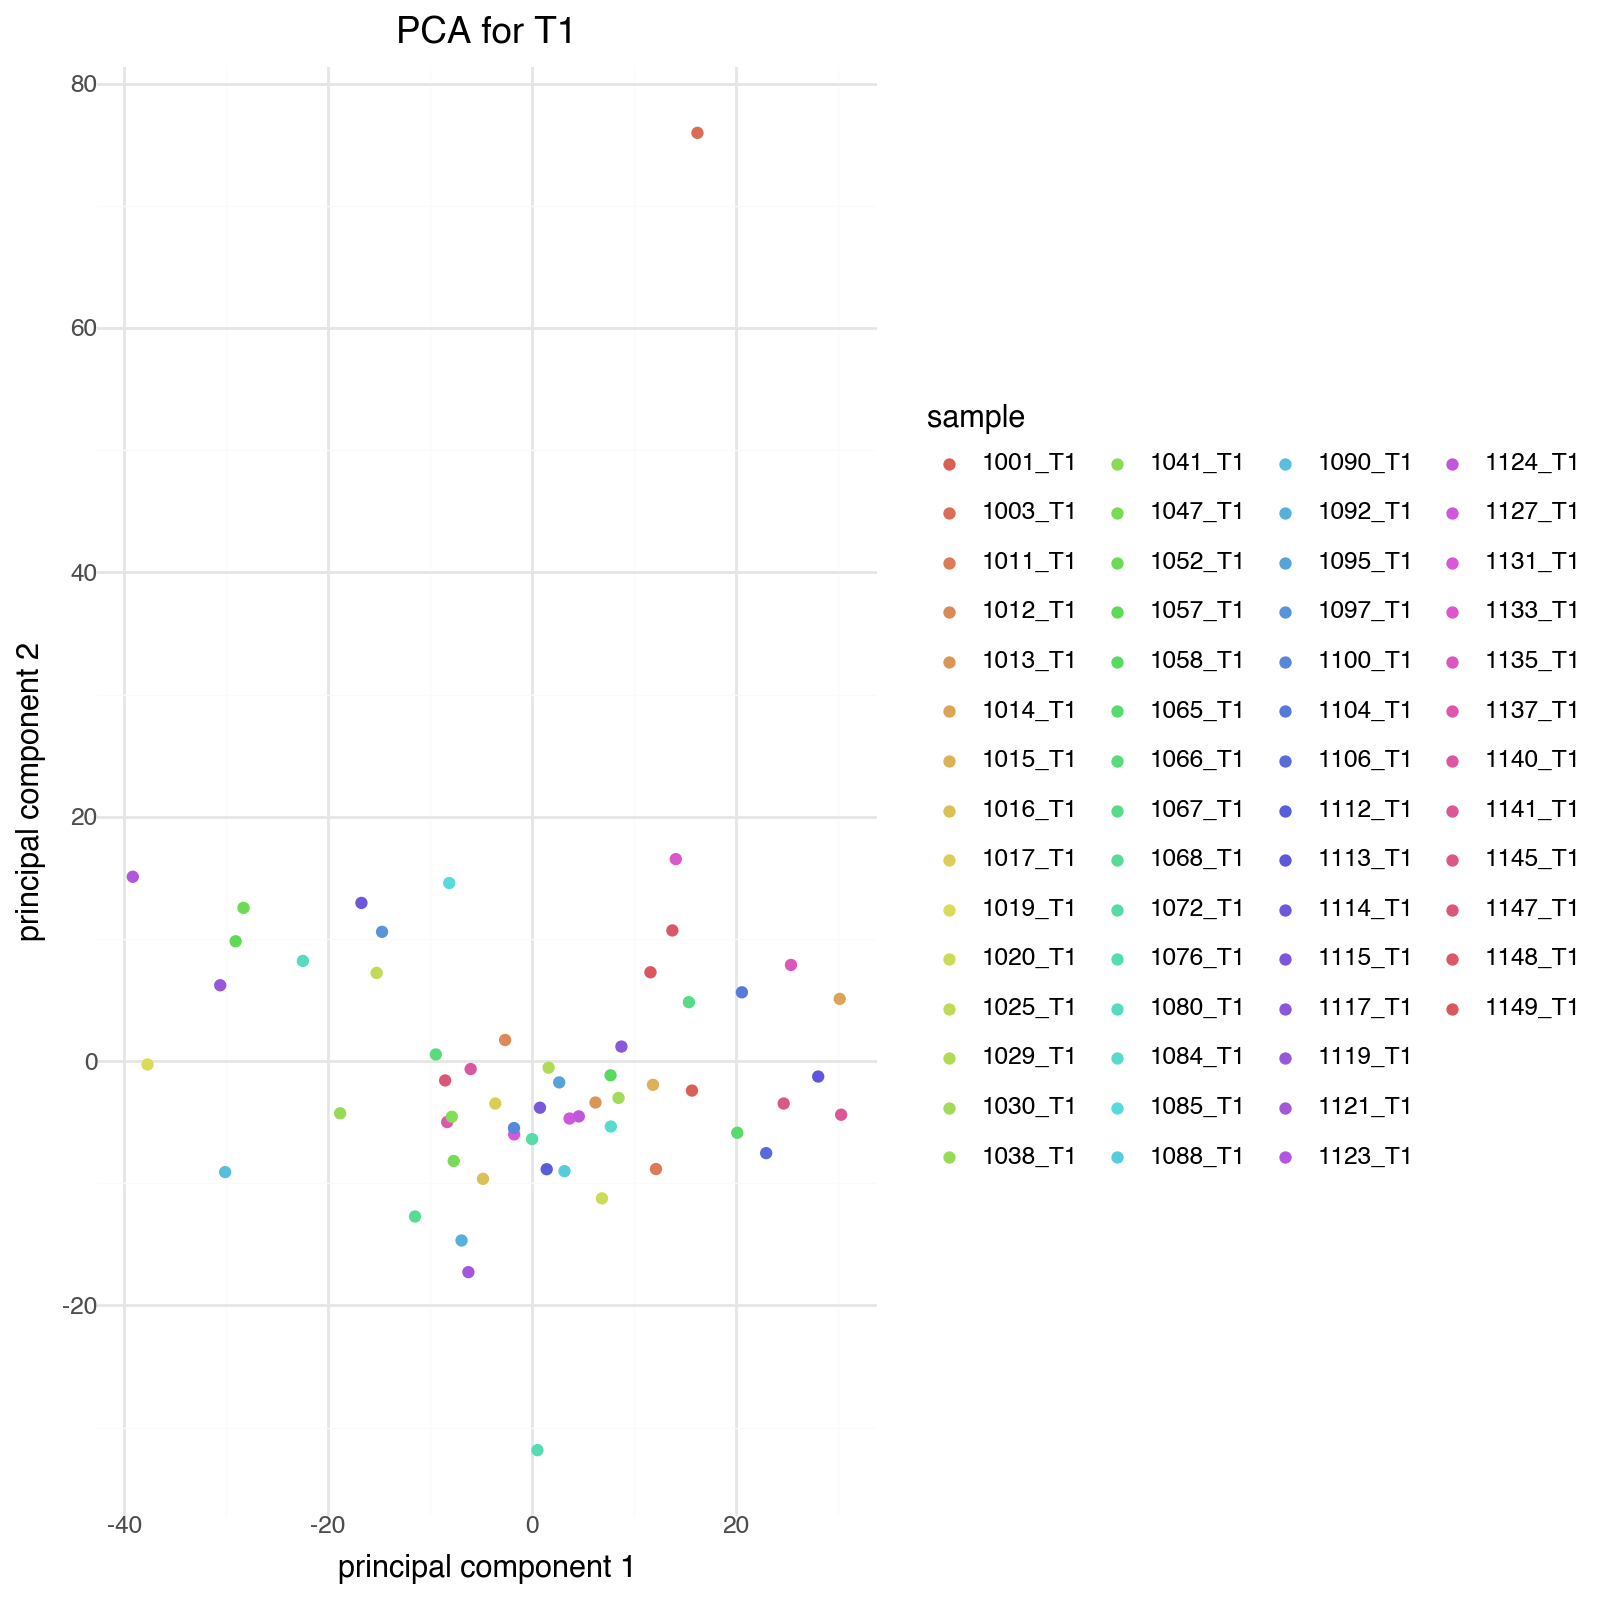

In [58]:
# PCA analysis for T1
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_T1.T)
principalDf_T1 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_T1['sample'] = df_T1.columns
principalDf_T1['time_point'] = 'T1'

# Plot the PCA for T1
p = (p9.ggplot(data = principalDf_T1,
                mapping = p9.aes(x = 'principal component 1', y = 'principal component 2', color = 'sample')) +
     p9.geom_point() +
     p9.ggtitle("PCA for T1") +
     p9.theme_minimal() +
     p9.theme(figure_size = (8, 8))
    )
p


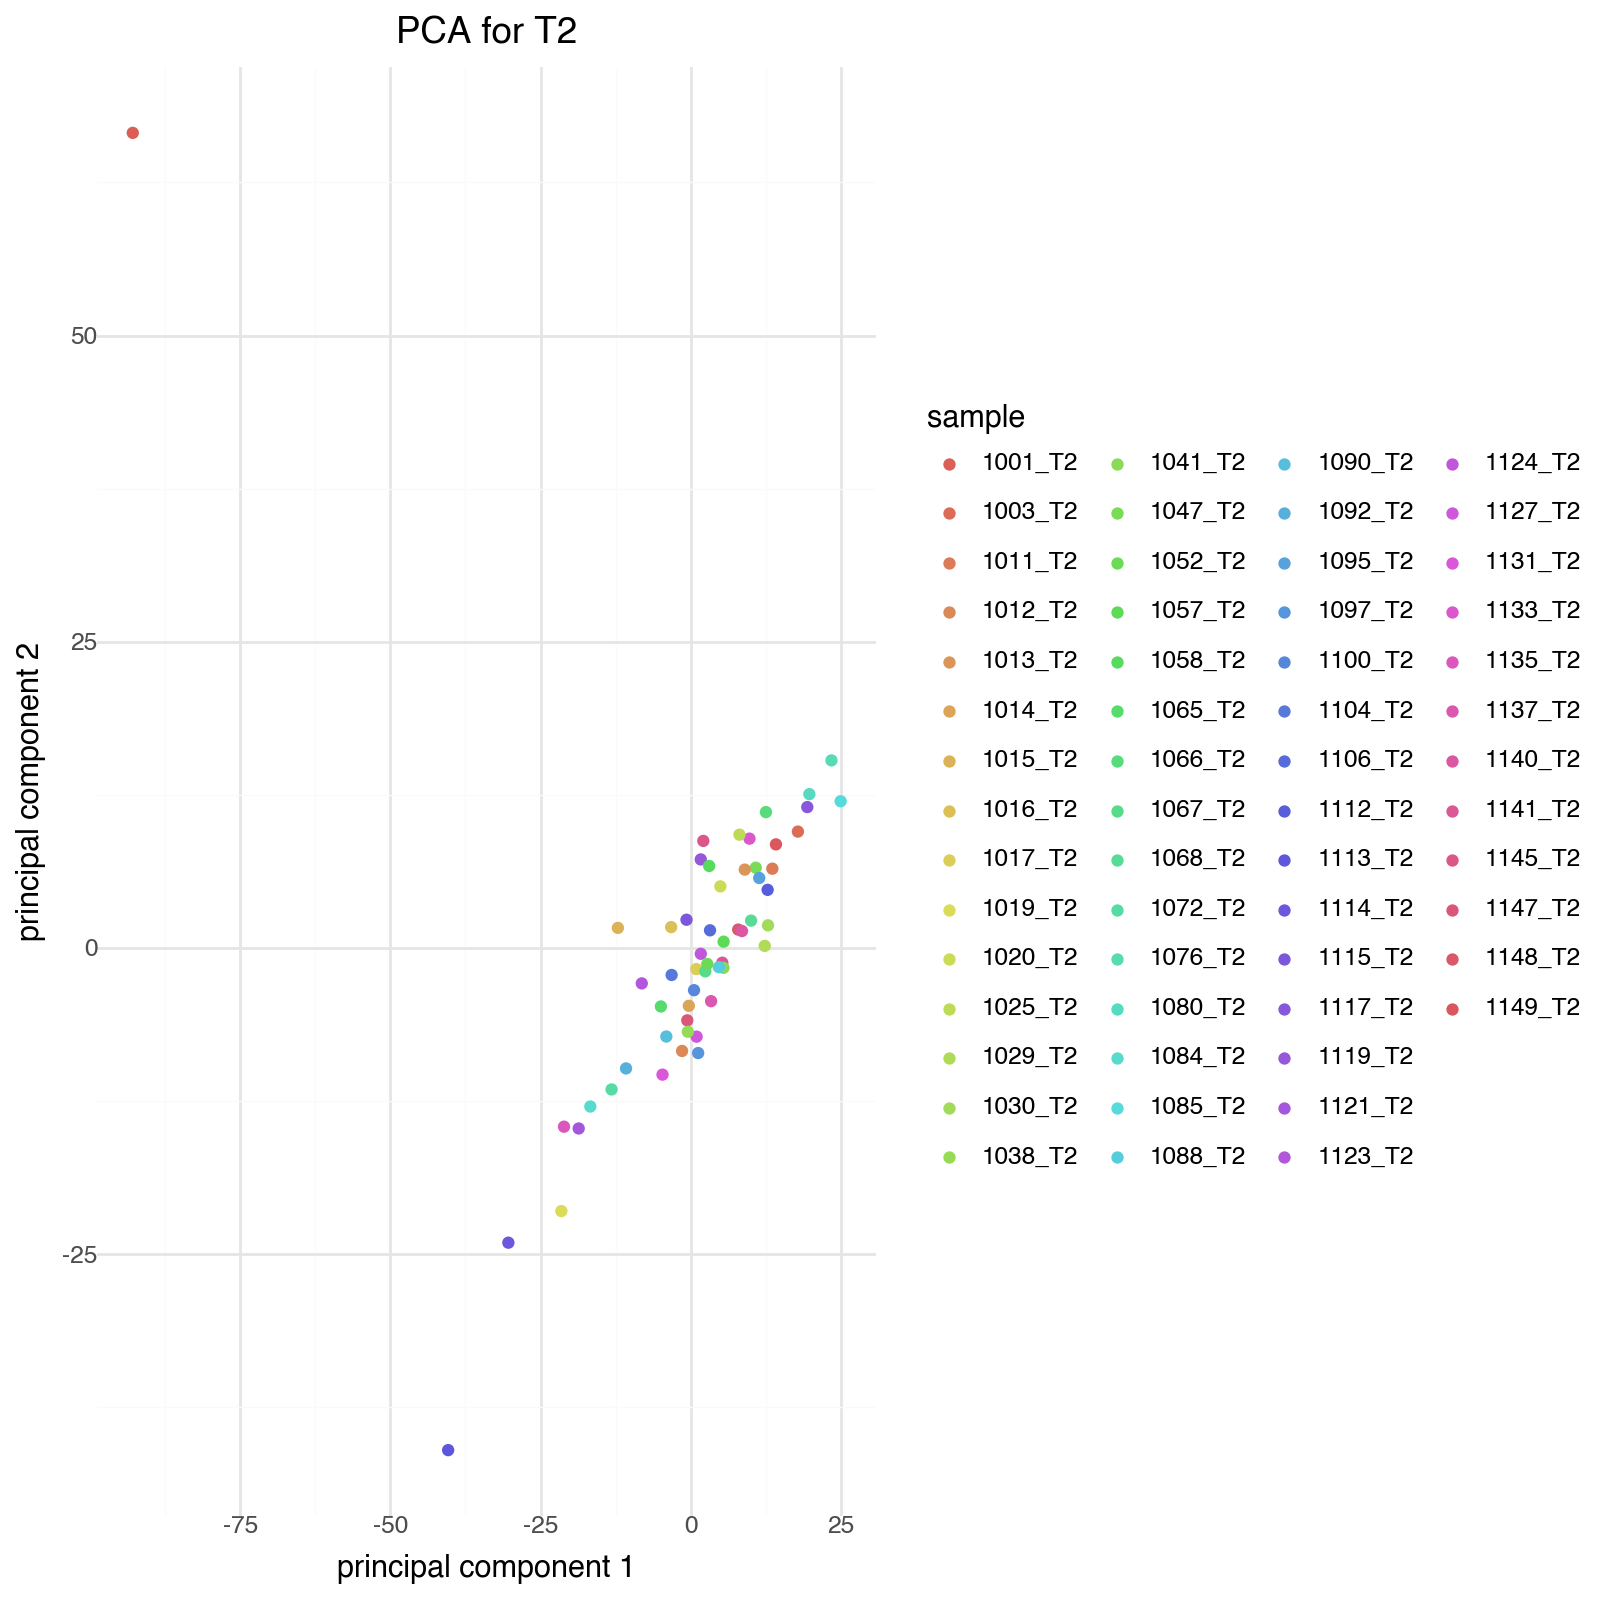

In [59]:
# PCA analysis for T2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_T2.T)
principalDf_T2 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_T2['sample'] = df_T2.columns
principalDf_T2['time_point'] = 'T2'

# Plot the PCA for T2
p = (p9.ggplot(data = principalDf_T2,
                mapping = p9.aes(x = 'principal component 1', y = 'principal component 2', color = 'sample')) +
     p9.geom_point() +
     p9.ggtitle("PCA for T2") +
     p9.theme_minimal() +
     p9.theme(figure_size = (8, 8))
    )
p


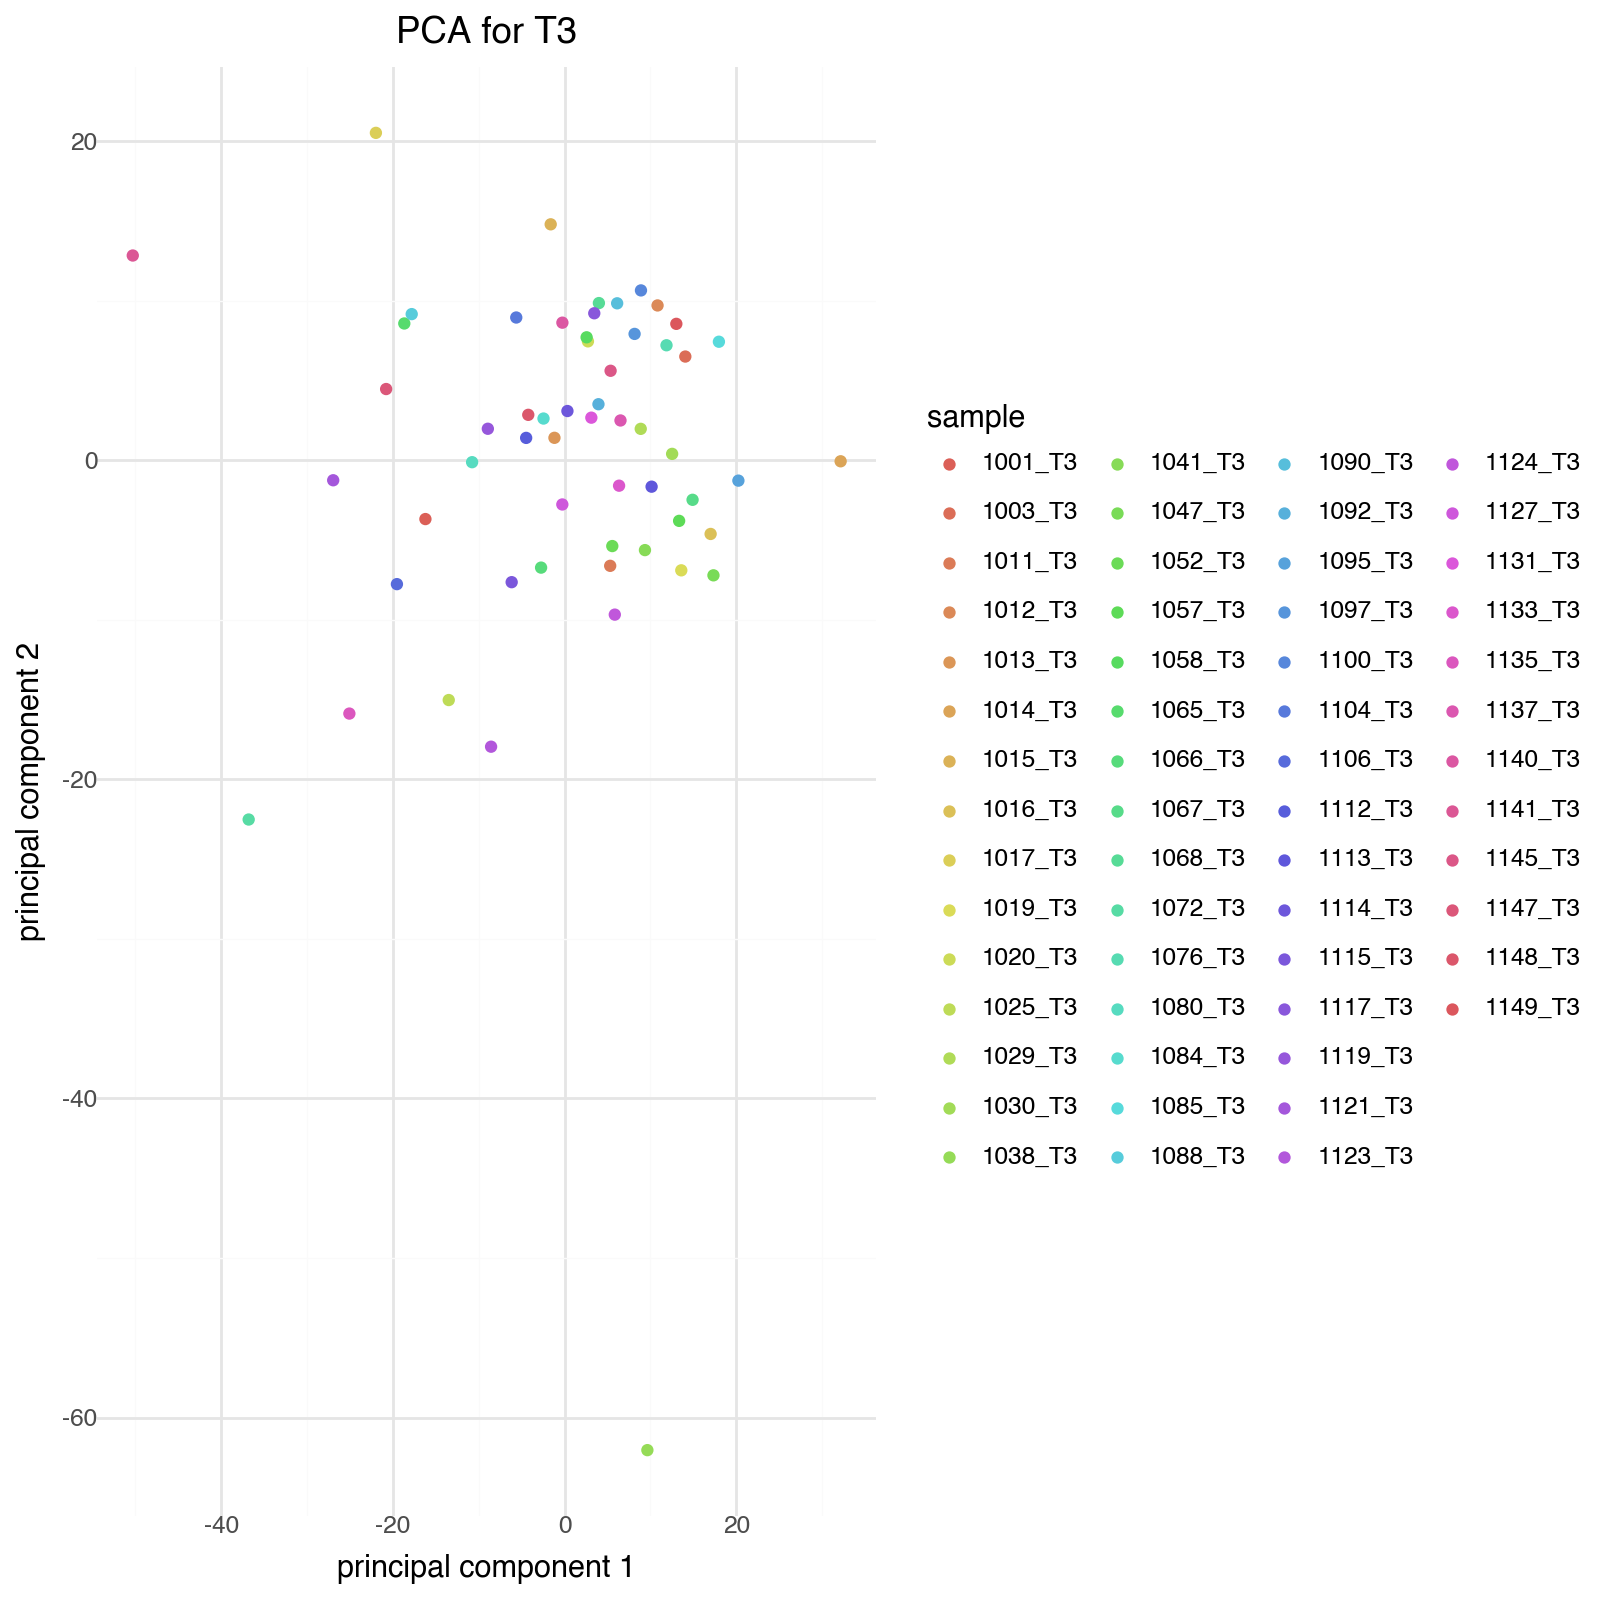

In [60]:
# PCA analysis for T3
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_T3.T)
principalDf_T3 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_T3['sample'] = df_T3.columns
principalDf_T3['time_point'] = 'T3'

# Plot the PCA for T3
p = (p9.ggplot(data = principalDf_T3,
                mapping = p9.aes(x = 'principal component 1', y = 'principal component 2', color = 'sample')) +
     p9.geom_point() +
     p9.ggtitle("PCA for T3") +
     p9.theme_minimal() +
     p9.theme(figure_size = (8, 8))
    )
p


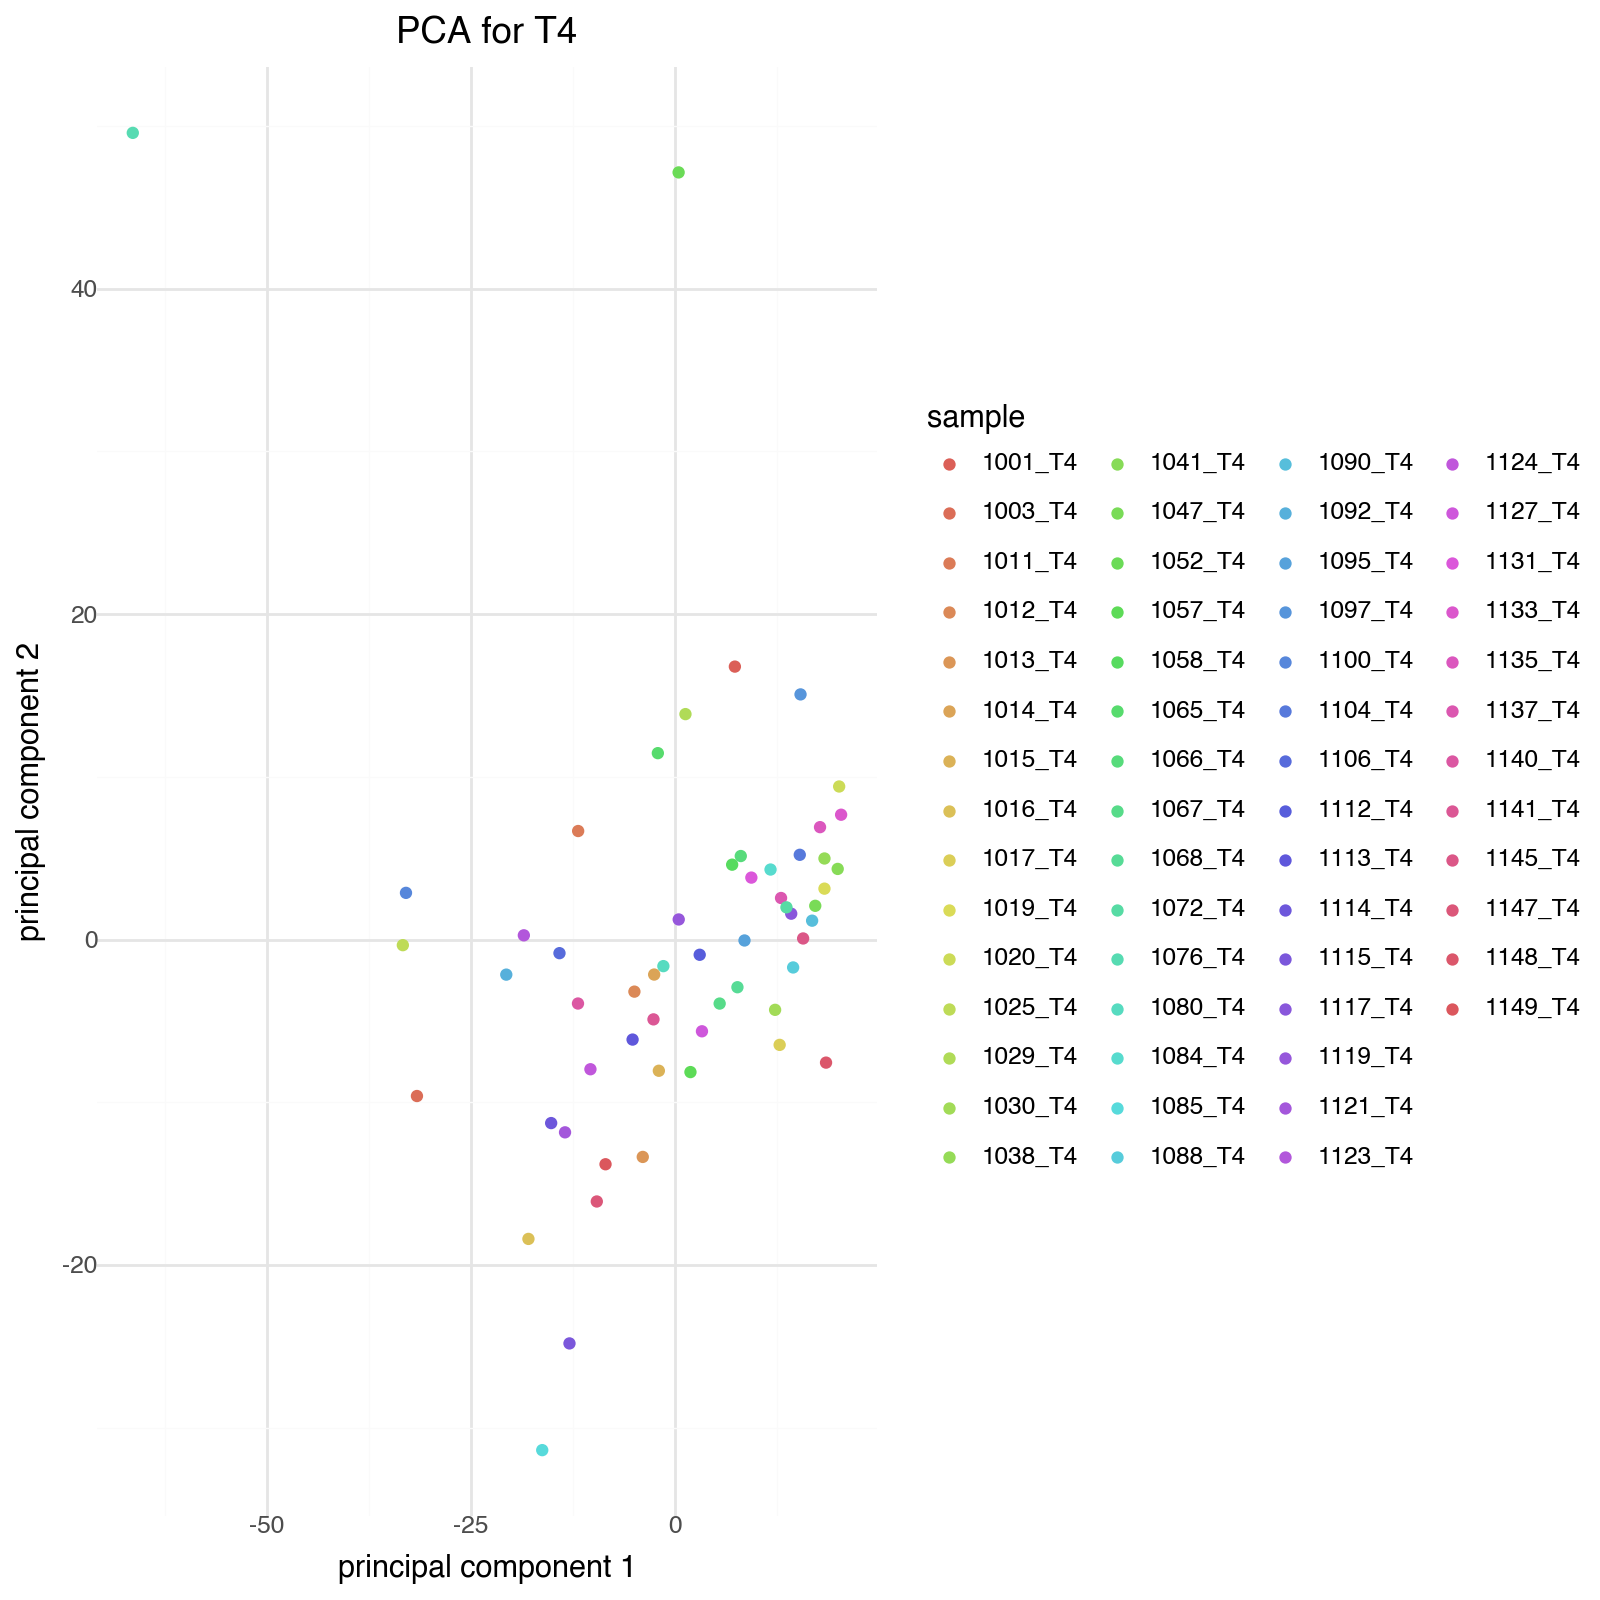

In [61]:
# PCA analysis for T4
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_T4.T)
principalDf_T4 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_T4['sample'] = df_T4.columns
principalDf_T4['time_point'] = 'T4'

# Plot the PCA for T4
p = (p9.ggplot(data = principalDf_T4,
                mapping = p9.aes(x = 'principal component 1', y = 'principal component 2', color = 'sample')) +
     p9.geom_point() +
     p9.ggtitle("PCA for T4") +
     p9.theme_minimal() +
     p9.theme(figure_size = (8, 8))
    )
p


In [69]:
df_T1.to_csv('temp_data/T1.csv', index = True)
df_T2.to_csv('temp_data/T2.csv', index = True)
df_T3.to_csv('temp_data/T3.csv', index = True)
df_T4.to_csv('temp_data/T4.csv', index = True)

## Reading Raw dataset for DESeq2

In [70]:
df_raw = pd.read_csv('temp_data/GSE174083_RAW_READ_COUNTS.csv')

In [72]:
df_raw.rename(columns = {'Unnamed: 0':'gene_ID'}, inplace = True)

In [79]:
columns = df_raw.columns.to_list()
updated_columns = ['gene_ID']

for i in range(1, len(columns)):
    updated_columns.append(columns[i][0:7])

updated_columns[0:5]
df_raw.columns = updated_columns

In [82]:
df_raw.index = df_raw['gene_ID']

In [83]:
# Drop the column which doesnt start with '1'
df_raw = df_raw.loc[:, df_raw.columns.str.startswith('1')]

In [84]:
df_raw = df_raw[filtered_updated_columns]

In [85]:
df_raw.head(2)

,1068_T1,1068_T2,1068_T3,1068_T4,1119_T1,1119_T2,1119_T3,1119_T4,1133_T1,1133_T2,...,1140_T3,1140_T4,1090_T1,1090_T2,1090_T3,1090_T4,1106_T1,1106_T2,1106_T3,1106_T4
gene_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df_raw.to_csv('temp_data/RAW_DATA.csv', index = True)

## Cluster Analysis

In [87]:
T1_clust = pd.read_csv('temp_data/dfT1.T_50.csv')
T2_clust = pd.read_csv('temp_data/dfT2.T_50.csv')
T3_clust = pd.read_csv('temp_data/dfT3.T_50.csv')
T4_clust = pd.read_csv('temp_data/dfT4.T_50.csv')

In [89]:
T4_clust.head()

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,UMAP1,UMAP2,cluster
0,X1052_T4,-76.444797,-7.493357,-8.435916,17.389936,-116.262796,-16.486036,15.864415,-23.964820,42.692432,...,0.759369,0.803434,-4.149310,-0.286646,-5.761494,0.684370,3.315832,-8.573839,5.170840,3
1,X1014_T4,35.795814,108.748628,-9.497031,-18.489480,1.991622,26.267168,74.179562,4.956794,-48.642486,...,3.668239,-9.814833,10.971021,-7.181883,-5.489171,-4.053972,2.731312,7.400382,-7.675992,2
2,X1119_T4,34.493811,105.198992,-11.093721,-20.779826,-6.584995,-11.787858,28.170132,-15.174336,13.805416,...,7.016527,-8.161837,27.727879,7.355212,11.846983,7.660017,-15.946242,7.069950,-7.856321,2
3,X1065_T4,35.232423,108.046079,-11.527118,-17.591062,-23.756375,2.351739,31.711450,-14.758254,19.494807,...,5.157578,-2.955851,6.711182,-3.850134,6.269137,-0.952846,7.746011,7.201673,-7.658649,2
4,X1100_T4,55.885722,-32.734269,-0.377110,71.015698,-14.187773,66.004042,50.806200,37.992457,-24.919747,...,-3.381199,-2.609986,2.064843,-8.198708,2.608261,3.454187,10.514816,4.772419,-0.539341,1
